# ChurnGuard: Developing a Predictive Model for Customer Churn in African Telecom

## Introduction

Welcome to the ChurnGuard Project! In today's competitive telecommunications industry, customer retention is a critical factor for sustaining business success. Churn, the phenomenon of customers discontinuing services, poses a significant challenge for telecom providers worldwide. The ChurnGuard Project aims to tackle this challenge by developing a predictive model to determine the likelihood of a customer churning, specifically by ceasing to purchase airtime and data from our client, an African telecommunications company.

## Business Understanding

For our African telecommunications client, reducing churn is essential for maintaining revenue streams and ensuring long-term profitability. Understanding the factors contributing to churn and accurately predicting which customers are at risk of leaving is paramount. By identifying at-risk customers early on, the telecom company can implement targeted retention strategies to prevent churn and foster customer loyalty.

The key objective of the ChurnGuard Project is to develop a predictive model that accurately determines the likelihood of customer churn, specifically by ceasing to purchase airtime and data from our client, an African telecommunications company, based on historical customer data, including purchase patterns, usage behavior, demographics, and other relevant features. By leveraging machine learning techniques, the predictive model will analyze past customer behavior to identify patterns indicative of potential churn.

The dataset includes 19 variables including 15 numeric variables and 04 categorical variables:

* **user_id:** 	  Unique identifier for each customer.
* **REGION:**   the location of each client
* **TENURE:** 	  duration in the network
* **MONTANT:** 	top-up amount (Amount spent by the customer)
* **FREQUENCE_RECH:** 	A number of times the customer refilled (Frequency of recharges by the customer.)
* **REVENUE:**	monthly income of each client
* **ARPU_SEGMENT:** 	income over 90 days / 3
* **FREQUENCE:** 	number of times the client has made an income
* **DATA_VOLUME:** 	number of connections (i.e. Volume of data consumed by the customer)
* **ON_NET:**	inter expresso call
* **ORANGE:**	call to Rrange network by the customer.
* **TIGO:** 	call to Tigo network by the customer.
* **ZONE1:** 	call to zones1 network by the customer.
* **ZONE2:** 	call to zones2 network by the customer.
* **MRG:** 	a client who is going
* **REGULARITY:** 	number of times the client is active for 90 days
* **TOP_PACK:** 	the most active packs
* **FREQ_TOP_PACK:** 	number of times the client has activated the top pack packages (Frequency of the top package subscription)
* **CHURN:** 	Target variable indicating if the customer has churned (1) or not (0).


## Hypothesis

- **Null Hypothesis (H0):**

There is no significant difference in churn rates between different geographic regions served by the African telecommunications company.

- **Alternative Hypothesis (H1):**

There is a significant difference in churn rates between different geographic regions served by the African telecommunications company.

## Business Questions

1) What is the overall churn rate observed in the dataset.

2) How does churn vary across different geographic regions served by the telecommunications company.

3) What is the churn rate (proportion of churned customers) for each tenure category.

4) Are customers who frequently activate specific top pack packages (TOP_PACK) less likely to churn, and can certain top packs be associated with higher customer retention rates?

5) Do customers who have a higher number of on-net calls (ON_NET) exhibit lower churn rates, suggesting a correlation between on-net calling behavior and customer loyalty?

6) Is there evidence to suggest that customers who regularly refill their accounts (FREQUENCE_RECH) have lower churn rates compared to those who refill less frequently, indicating a relationship between recharge frequency and churn propensity?

7) Is there a correlation between the top-up amount (MONTANT) and churn rates, and do customers with higher or lower top-up amounts demonstrate different churn behaviors?

## DATA UNDERSTANDING
## Importation

In [ ]:
%pip install pandas
%pip install python-dotenv
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install plotly
%pip install imbalanced-learn
%pip install plotly-express

In [8]:
# Import necessary libraries for data handling 
import pyodbc
import pandas as pd
import numpy as np
from dotenv import dotenv_values

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# hypothesis testing
from scipy.stats import chi2_contingency

# Machine learning classification model from sklean
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature Processing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.base import TransformerMixin
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from functools import partial
from sklearn.metrics import roc_auc_score, roc_curve, auc

# class imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as impipeline

# Hyperparameters Fine-tuning
from sklearn.model_selection import GridSearchCV

# Other utilities
import joblib
import os
import pickle

## Data Loading

In [9]:
df = pd.read_csv('../Dataset/Train.csv')
df

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,56e22fe3312a48cf860b043a021dab275383a20a,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,16,NaN,NaN,0
1077020,587b72930e4d36b3fb94a18c3ef65c2079460eee,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.0,833.0,5.0,0.0,15.0,77.0,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.0,0
1077021,d6831b8edacb7d9928b3f053fb1283574577ae42,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,1
1077022,cb1f6510b084173c0deae49095f35ac29f916701,NaN,K > 24 month,600.0,1.0,600.0,200.0,1.0,591.0,11.0,37.0,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.0,0


## Data understanding & EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

- **Insight📣**

The DataFrame contains 1,077,024 entries and 19 columns. Some columns have missing values (NaN), which may require handling during data preprocessing.

In [11]:
# check for duplicates
dup = df.duplicated().sum()
print(f'This dataset has',dup,'duplicates')

This dataset has 0 duplicates


In [12]:
# check null values
df.isnull().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [13]:
# Check the percentage of missing values
(df.isnull().sum()/(len(df)))*100

user_id            0.000000
REGION            39.399029
TENURE             0.000000
MONTANT           35.086033
FREQUENCE_RECH    35.086033
REVENUE           33.644097
ARPU_SEGMENT      33.644097
FREQUENCE         33.644097
DATA_VOLUME       49.187669
ON_NET            36.505593
ORANGE            41.516624
TIGO              59.866261
ZONE1             92.117353
ZONE2             93.612584
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.864898
FREQ_TOP_PACK     41.864898
CHURN              0.000000
dtype: float64

- **Insight📣**

- **High Null Percentage:**
Features like ZONE1 and ZONE2 have exceptionally high null percentages (92.12% and 93.61% respectively), indicating that these attributes are mostly missing from the dataset.

- **Moderate Null Percentage:**
Features such as REGION, DATA_VOLUME, ON_NET, ORANGE, TIGO, TOP_PACK, and FREQ_TOP_PACK exhibit moderate null percentages ranging from 35% to 59.87%. While these attributes have a considerable number of missing values, they still contain substantial information that could be valuable for analysis. Imputation techniques or careful handling of missing data might be necessary to utilize these features effectively.

- **Low Null Percentage:**
Some features, such as MONTANT, FREQUENCE_RECH, REVENUE, ARPU_SEGMENT, and FREQUENCE, have relatively low null percentages ranging from 33.64% to 41.86%. Despite missing values, these attributes still retain a significant portion of the dataset and can potentially provide valuable insights into customer behavior and churn prediction. However, missing value imputation or careful analysis of these features' impact on the model may be required.

- **No Null Values:**
Features like user_id, TENURE, MRG, REGULARITY, and CHURN have no null values, indicating that they are complete and available for analysis without any preprocessing requirements.

In conclusion, these missing values could indicate various scenarios, such as customers who haven't performed certain types of transactions or customers with incomplete usage records.

In [14]:
# View the unique enteries in the selected columns
print("Unique values in 'REGION' column:")
print(df['REGION'].unique())

print("\nUnique values in 'TENURE' column:")
print(df['TENURE'].unique())

print("\nUnique values in 'MONTANT' column:")
print(df['MONTANT'].unique())

print("\nUnique values in 'FREQUENCE_RECH' column:")
print(df['FREQUENCE_RECH'].unique())

print("\nUnique values in 'REVENUE' column:")
print(df['REVENUE'].unique())

print("\nUnique values in 'ARPU_SEGMENT' column:")
print(df['ARPU_SEGMENT'].unique())

print("\nUnique values in 'FREQUENCE' column:")
print(df['FREQUENCE'].unique())

print("\nUnique values in 'DATA_VOLUME' column:")
print(df['DATA_VOLUME'].unique())

print("\nUnique values in 'ORANGE' column:")
print(df['ORANGE'].unique())

print("\nUnique values in 'ON_NET' column:")
print(df['ON_NET'].unique())

print("\nUnique values in 'TIGO' column:")
print(df['TIGO'].unique())

print("\nUnique values in 'ZONE1' column:")
print(df['ZONE1'].unique())

print("\nUnique values in 'ZONE2' column:")
print(df['ZONE2'].unique())

print("\nUnique values in 'MRG' column:")
print(df['MRG'].unique())

print("\nUnique values in 'REGULARITY' column:")
print(df['REGULARITY'].unique())

print("\nUnique values in 'TOP_PACK' column:")
print(df['TOP_PACK'].unique())

print("\nUnique values in 'FREQ_TOP_PACK' column:")
print(df['FREQ_TOP_PACK'].unique())

print("\nUnique values in 'CHURN' column:")
print(df['CHURN'].unique())

Unique values in 'REGION' column:
['DAKAR' nan 'SAINT-LOUIS' 'THIES' 'LOUGA' 'MATAM' 'FATICK' 'KAOLACK'
 'DIOURBEL' 'TAMBACOUNDA' 'ZIGUINCHOR' 'KOLDA' 'KAFFRINE' 'SEDHIOU'
 'KEDOUGOU']

Unique values in 'TENURE' column:
['K > 24 month' 'E 6-9 month' 'H 15-18 month' 'G 12-15 month'
 'I 18-21 month' 'J 21-24 month' 'F 9-12 month' 'D 3-6 month']

Unique values in 'MONTANT' column:
[20000.    nan  7900. ... 35475.  6216.  8949.]

Unique values in 'FREQUENCE_RECH' column:
[ 47.  nan  19.  21.   2.   1.  13.   3.   5.  14.   7.  20.  15.   4.
  16.  11.   8.  23.  18.  17.  12.  27.  50.  40.   9.   6.  32.  39.
  33.  38.  48.  60.  26.  49.  10.  44.  22.  30.  28.  46.  52.  25.
  45.  24.  36.  62.  37.  58.  29.  69.  51.  31.  64.  35.  56.  85.
  73.  53.  55.  34.  57.  43.  72.  70.  65.  68.  61.  75.  41.  42.
  54.  76.  80.  71.  83.  82.  81.  59.  74.  67.  63.  66.  93.  78.
  77.  84.  79.  87.  88.  92.  94. 110.  86.  95.  98.  89.  96. 101.
 100. 114.  91. 104.  90. 103. 

In [15]:
# Getting the summary statistics of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


- **Insight📣**

**MONTANT (Top-Up Amount):**

- The average top-up amount is moderate (5529.21), with a standard deviation of 7104.74, indicating significant variability in spending behavior among customers.
- The distribution ranges from a minimum of 20 to a maximum of 470,000, this wide range of top-up amounts suggests diverse spending behaviors among customers, with some spending significantly more than others.

**FREQUENCE_RECH (Frequency of Recharges):**

- The mean recharge frequency is 11.52, with a standard deviation of 13.26, indicating varying levels of engagement in recharging among customers.
- The distribution ranges from a minimum of 1 to a maximum of 131, showing significant differences in how often customers refill their accounts.

**REVENUE (Monthly Income):**

- The average monthly income is 5506.05, with a standard deviation of 7175.63, suggesting variability in income levels among customers.
- The distribution ranges from a minimum of 1 to a maximum of 532,177, indicating a wide range of income levels among customers.

**ARPU_SEGMENT (Average Revenue Per User):**

- The mean ARPU segment is 1835.36, with a standard deviation of 2391.87, suggesting variability in the average revenue generated per user.
- The distribution ranges from a minimum of 0 to a maximum of 177,392, indicating substantial differences in revenue generation among users.

**FREQUENCE (Frequency of Transactions):**

- The mean transaction frequency is 13.97, with a standard deviation of 14.69, indicating variability in transaction activity among customers.
- The distribution ranges from a minimum of 1 to a maximum of 91, showing significant differences in transaction engagement among users.

**DATA_VOLUME (Volume of Data Consumed):**

- The mean data volume consumed is 3368.80, with a standard deviation of 12898.93, suggesting variability in data usage patterns among customers.
- The distribution ranges from a minimum of 0 to a maximum of 1,702,309, indicating wide differences in data consumption levels among users.

These insights highlight the diversity and variability in customer behavior and usage patterns within Expresso's customer base. Understanding these patterns is crucial for developing effective strategies to predict churn and retain valuable customers.

### Univariate Analysis

Skewness of MONTANT: 4.405223404246733


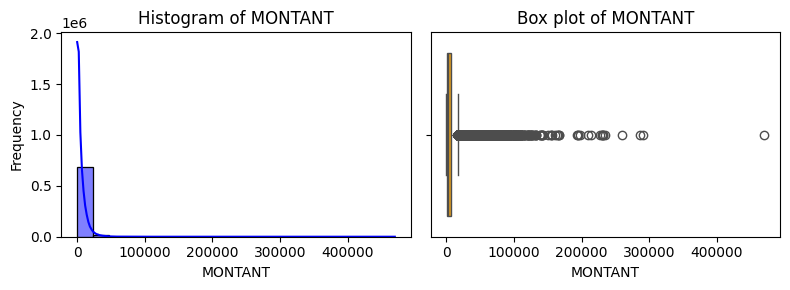

Skewness of FREQUENCE_RECH: 2.1128595748207872


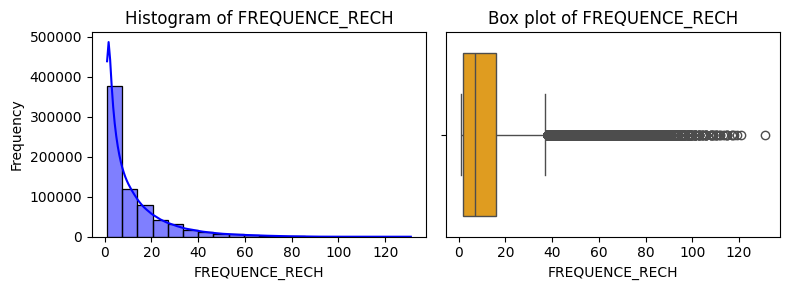

Skewness of REVENUE: 4.385561721426962


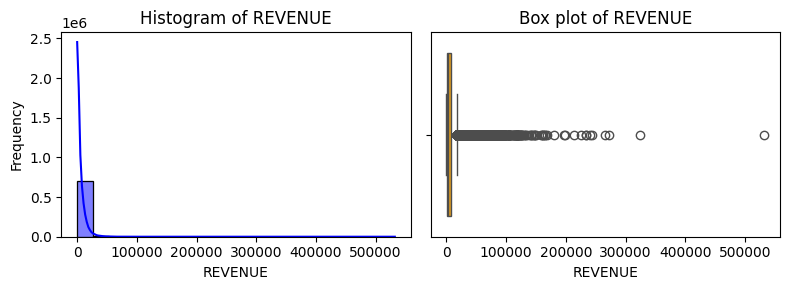

Skewness of ARPU_SEGMENT: 4.3855774237351275


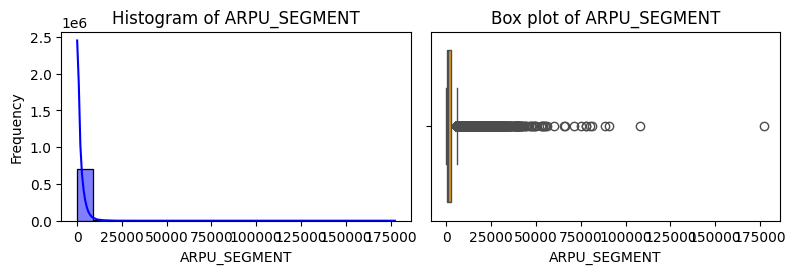

Skewness of FREQUENCE: 1.7768500285025306


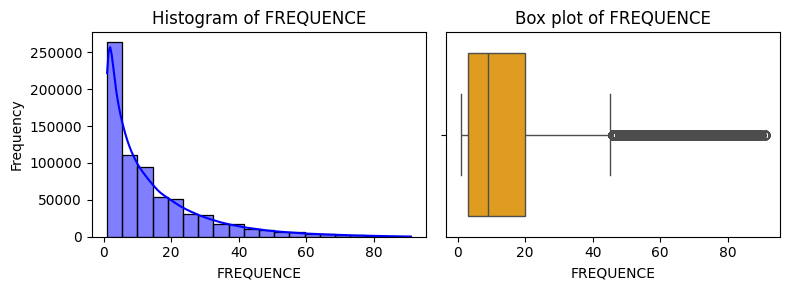

Skewness of DATA_VOLUME: 33.606660737689324


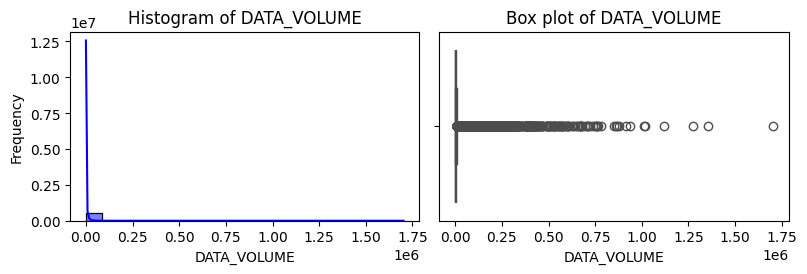

Skewness of ON_NET: 8.358705601342152


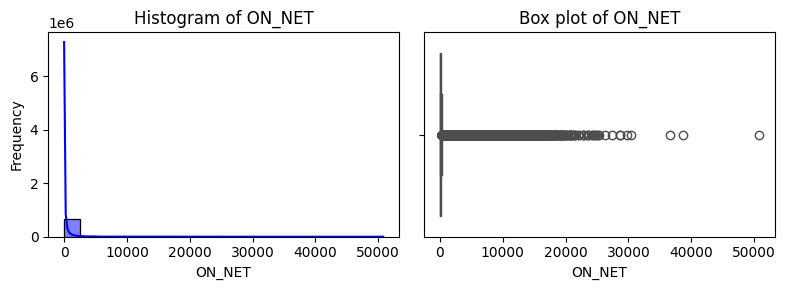

Skewness of ORANGE: 7.301204339685843


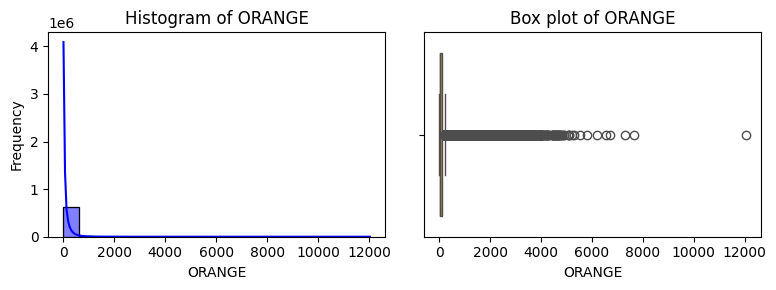

Skewness of TIGO: 13.233105224183795


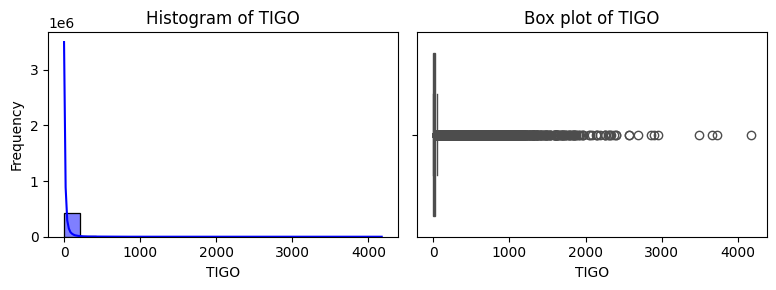

Skewness of ZONE1: 18.652712491793363


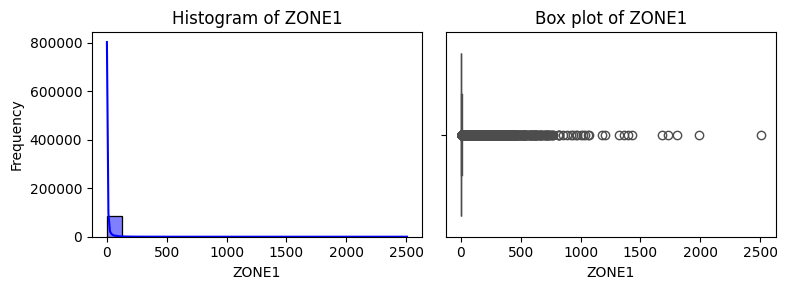

Skewness of ZONE2: 36.7286588586084


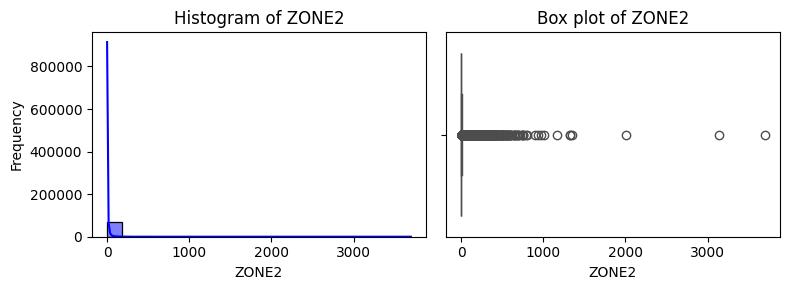

Skewness of REGULARITY: 0.24723432072711463


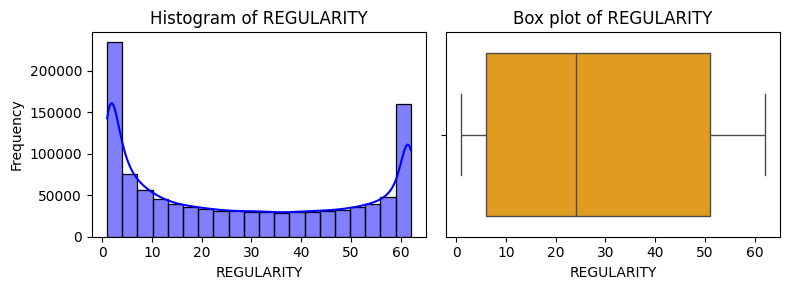

Skewness of FREQ_TOP_PACK: 3.905091433944376


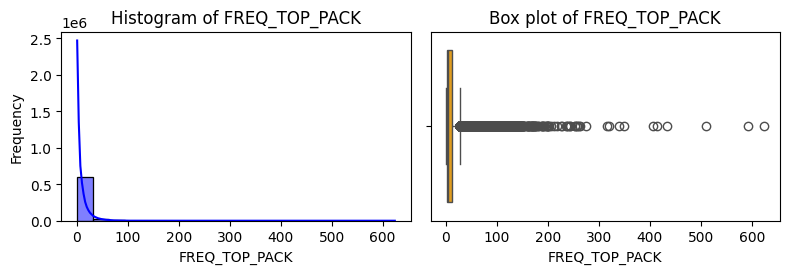

Skewness of CHURN: 1.6008856471222968


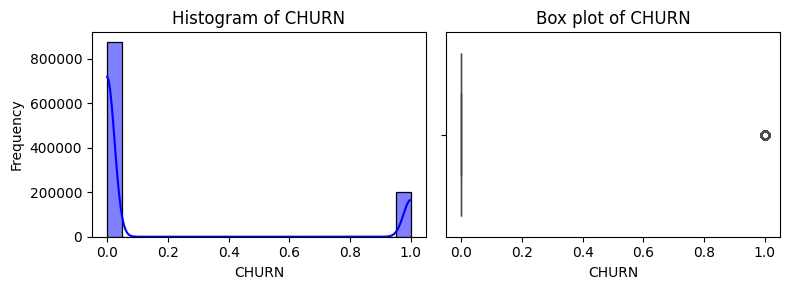

In [16]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column
for column in numerical_columns:
    # Set up subplots
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))

    # Histogram
    sns.histplot(df[column], bins=20, kde=True, color='Blue', ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    axes[0].grid(False)

    # Box plot
    sns.boxplot(x=df[column], color='Orange', ax=axes[1])
    axes[1].set_title(f'Box plot of {column}')
    axes[1].set_xlabel(column)
    axes[1].grid(False)

    # Adjust layout
    plt.tight_layout()

    # Skewness
    skewness = df[column].skew()
    print(f"Skewness of {column}: {skewness}")

    plt.show()

- **Insight📣**

- **Highly Right-Skewed Distributions (Skewness > 1):**

Variables such as DATA_VOLUME, ON_NET, ORANGE, TIGO, ZONE1, and ZONE2 exhibit highly right-skewed distributions, with skewness values ranging from 8.36 to 36.73. This indicates that most of the data is concentrated towards lower values, while a few observations have significantly higher values. When handling missing values for these variables, imputing with the median will be more appropriate to avoid biase towards higher values due to outliers.

- **Moderately Right-Skewed Distributions (Skewness between 0 and 1):**

FREQUENCE_RECH, FREQUENCE, and FREQ_TOP_PACK show moderately right-skewed distributions, with skewness values ranging from 1.78 to 3.91. While these distributions are not as extreme as the highly right-skewed ones, due to the presence of skewness and the potential influence of outliers. Imputing missing values with the median would be considered based on the characteristics of the data.

- **Nearly Symmetrical Distribution (Skewness close to 0):**

**REGULARITY** exhibits a skewness value close to 0, indicating a nearly symmetrical distribution. Imputing missing values for this variable with the mean would be suitable since there is no strong skewness/outliers to consider.


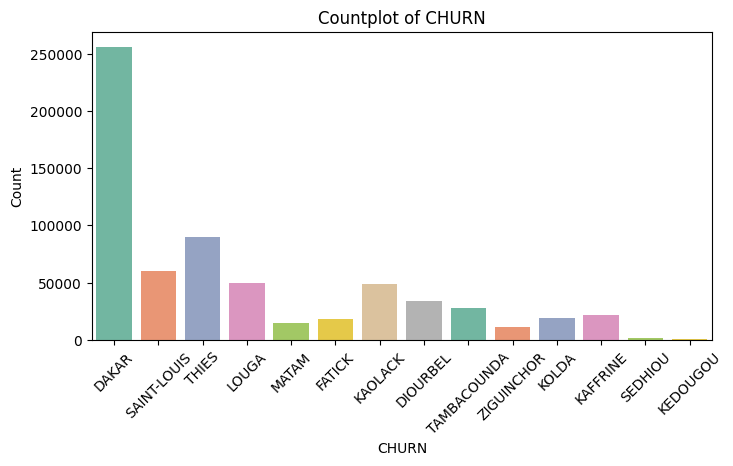

In [17]:
# Univariate analysis for the REGION column.
plt.figure(figsize=(8, 4))
sns.countplot(x='REGION', data=df, palette='Set2')
plt.title(f'Countplot of {column}')
plt.xlabel(column)
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(False)
plt.show()

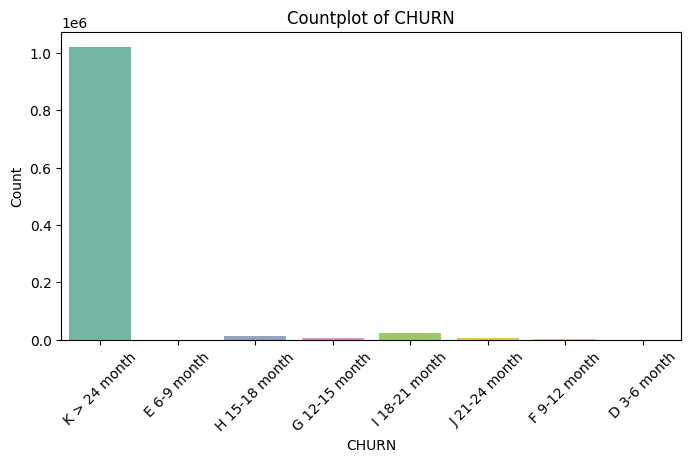

In [18]:
# Univariate analysis for the TENURE column.
plt.figure(figsize=(8, 4))
sns.countplot(x='TENURE', data=df, palette='Set2')
plt.title(f'Countplot of {column}')
plt.xlabel(column)
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(False)
plt.show()

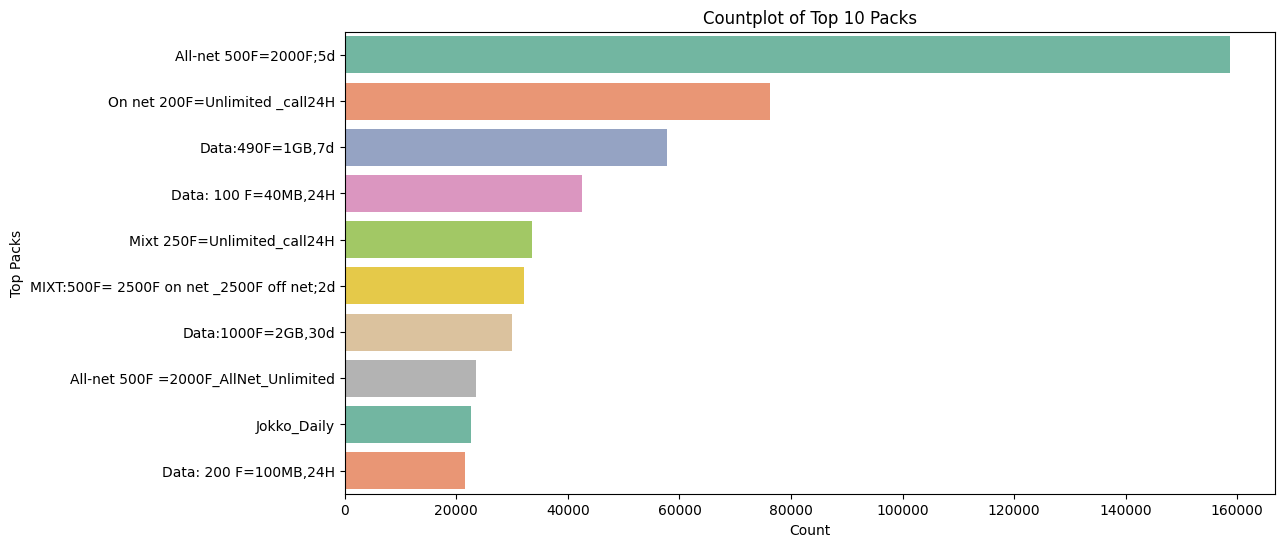

In [19]:
# Univariate analysis for the top 10 TOP_PACK column.
plt.figure(figsize=(12, 6)) 
sns.countplot(y='TOP_PACK', data=df, palette='Set2', order=df['TOP_PACK'].value_counts().index[:10])
plt.title('Countplot of Top 10 Packs')  
plt.xlabel('Count')  
plt.ylabel('Top Packs') 
plt.grid(False) 
plt.show() 



### BIVARIATE ANALYSIS

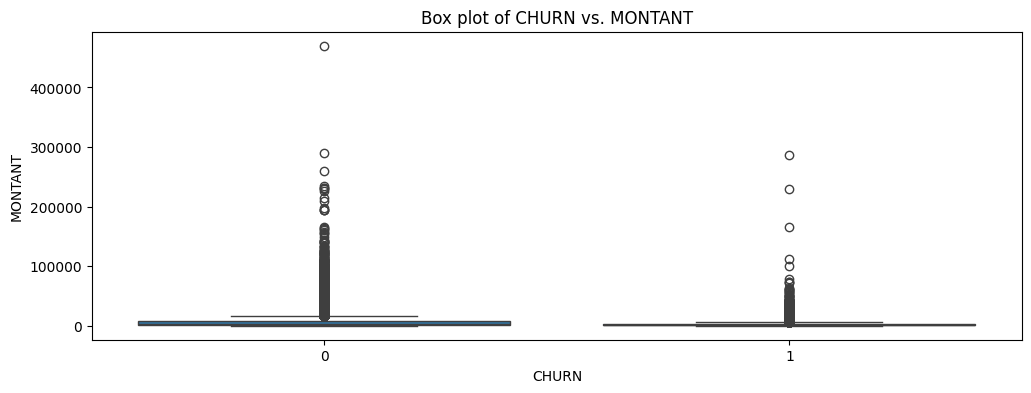

In [20]:
# Box plot of churn vs. MONTANT
plt.figure(figsize=(12, 4))
sns.boxplot(x='CHURN', y='MONTANT', data=df)
plt.title('Box plot of CHURN vs. MONTANT')
plt.xlabel('CHURN')
plt.ylabel('MONTANT')
plt.grid(False)
plt.show()

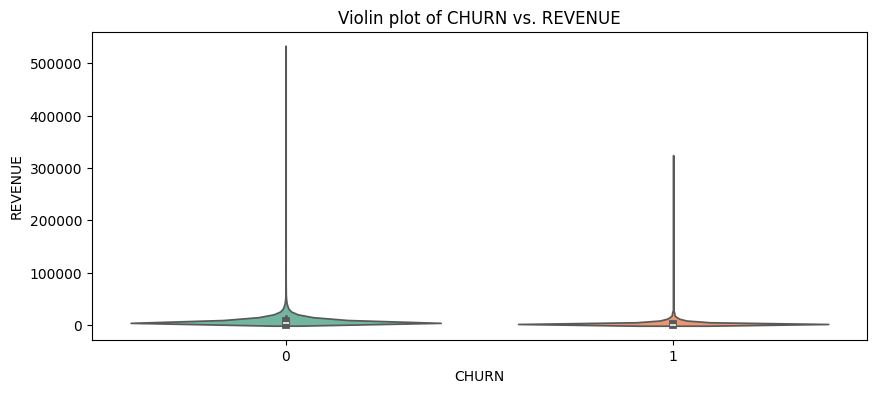

In [21]:
# Violin plot of churn vs. REVENUE
plt.figure(figsize=(10, 4))
sns.violinplot(x='CHURN', y='REVENUE', data=df, palette='Set2')
plt.title('Violin plot of CHURN vs. REVENUE')
plt.xlabel('CHURN')
plt.ylabel('REVENUE')
plt.grid(False)
plt.show()

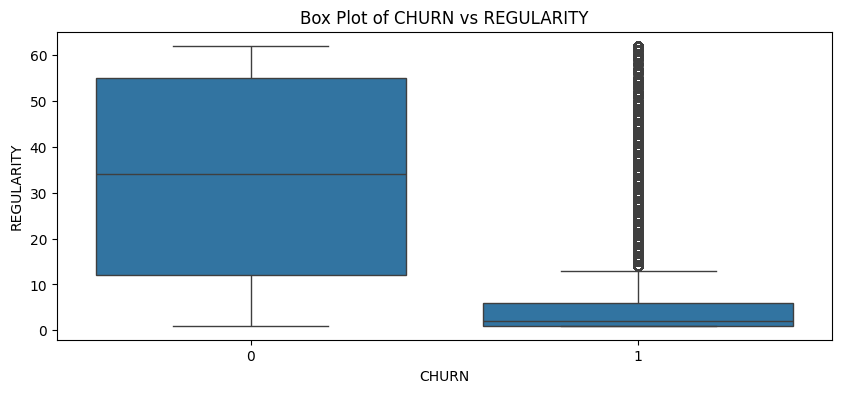

In [22]:
# Box plot of CHURN vs REGULARITY
plt.figure(figsize=(10, 4))
sns.boxplot(x='CHURN', y='REGULARITY', data=df)
plt.title('Box Plot of CHURN vs REGULARITY')
plt.xlabel('CHURN')
plt.ylabel('REGULARITY')
plt.grid(False)
plt.show()

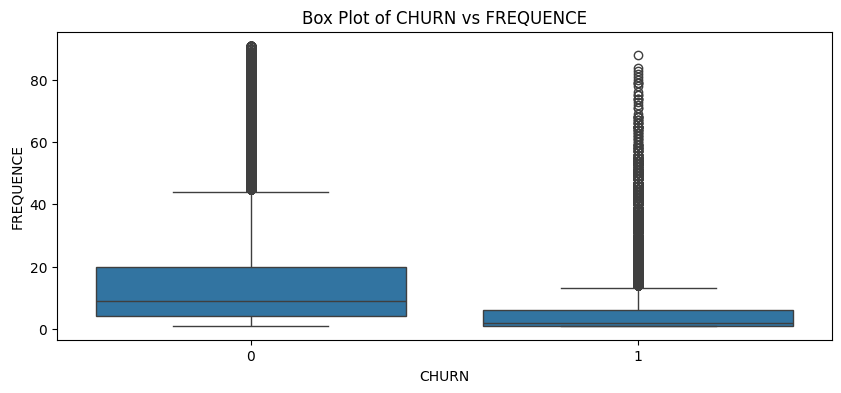

In [23]:
# Box plot of CHURN vs FREQUENCE
plt.figure(figsize=(10, 4))
sns.boxplot(x='CHURN', y='FREQUENCE', data=df)
plt.title('Box Plot of CHURN vs FREQUENCE')
plt.xlabel('CHURN')
plt.ylabel('FREQUENCE')
plt.grid(False)
plt.show()

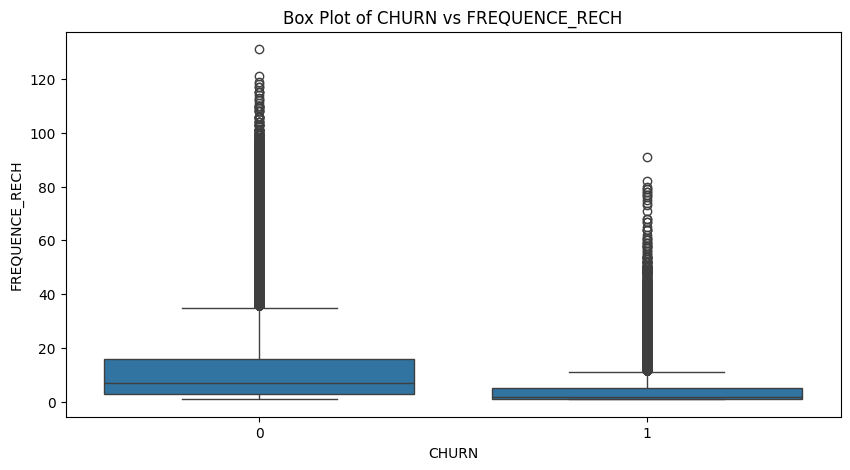

In [24]:
# Box plot of CHURN vs FREQUENCE_RECH
plt.figure(figsize=(10, 5))
sns.boxplot(x='CHURN', y='FREQUENCE_RECH', data=df)
plt.title('Box Plot of CHURN vs FREQUENCE_RECH')
plt.xlabel('CHURN')
plt.ylabel('FREQUENCE_RECH')
plt.grid(False)
plt.show()

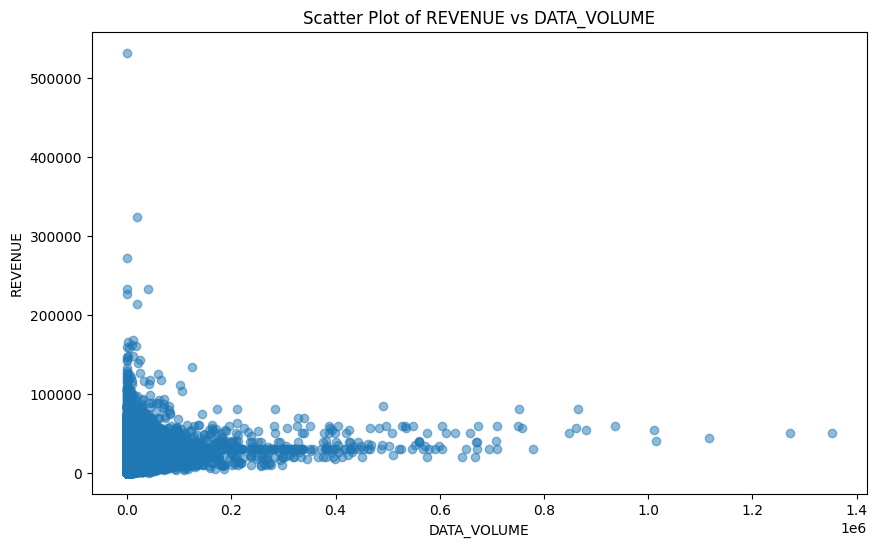

In [25]:
# Scatter plot of REVENUE vs DATA_VOLUME
plt.figure(figsize=(10, 6))
plt.scatter(df['DATA_VOLUME'], df['REVENUE'], alpha=0.5)
plt.title('Scatter Plot of REVENUE vs DATA_VOLUME')
plt.xlabel('DATA_VOLUME')
plt.ylabel('REVENUE')
plt.grid(False)
plt.show()

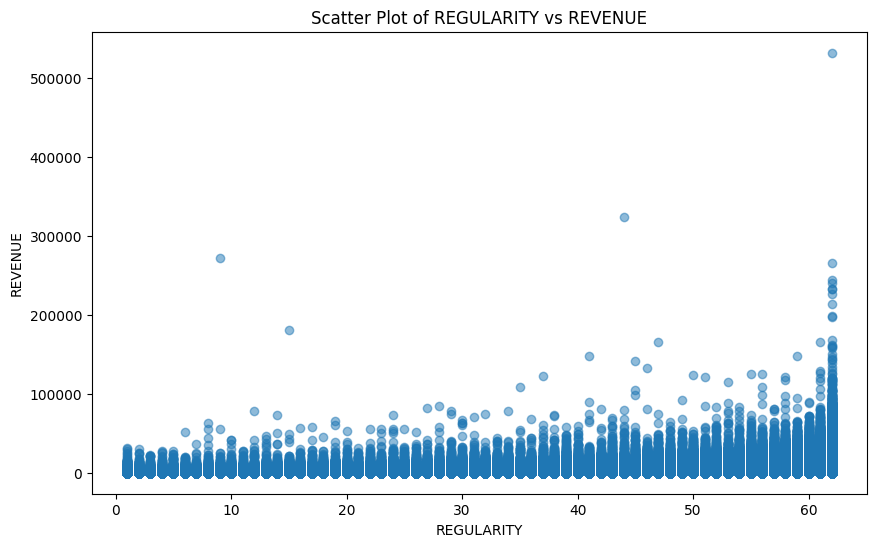

In [26]:
# Scatter plot of REGULARITY vs REVENUE
plt.figure(figsize=(10, 6))
plt.scatter(df['REGULARITY'], df['REVENUE'], alpha=0.5)
plt.title('Scatter Plot of REGULARITY vs REVENUE')
plt.xlabel('REGULARITY')
plt.ylabel('REVENUE')
plt.grid(False)
plt.show()

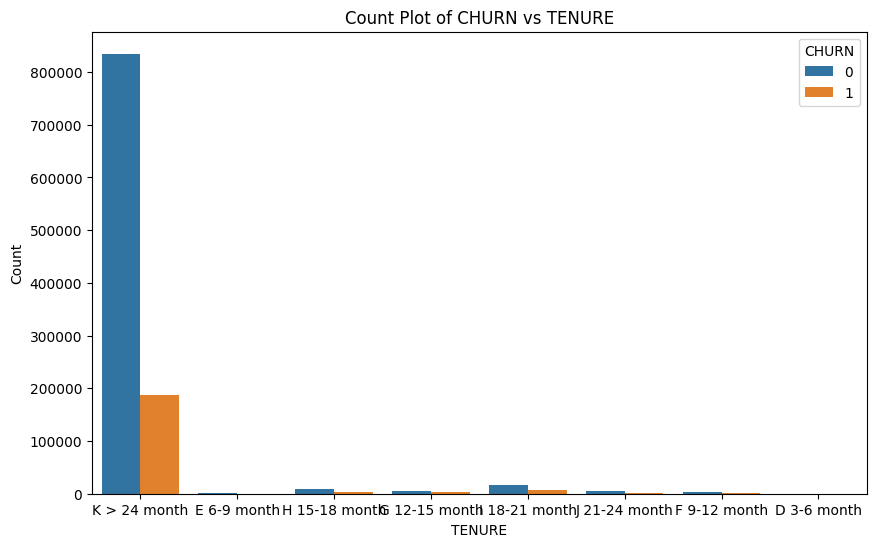

In [27]:
# Count plot of CHURN vs TENURE
plt.figure(figsize=(10, 6))
sns.countplot(x='TENURE', hue='CHURN', data=df)
plt.title('Count Plot of CHURN vs TENURE')
plt.xlabel('TENURE')
plt.ylabel('Count')
plt.grid(False)
plt.show()

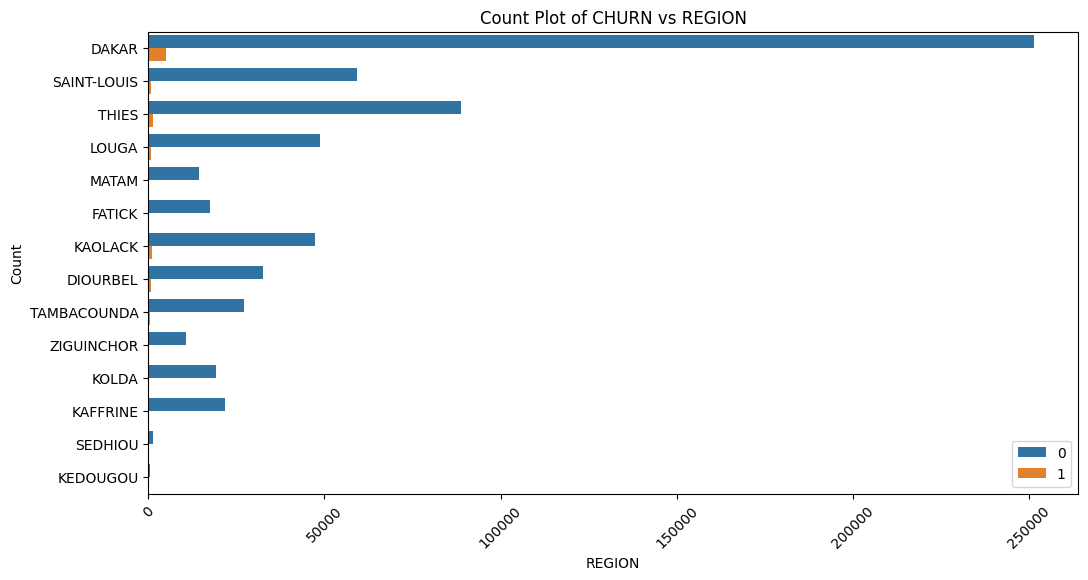

In [28]:
# Count plot of CHURN vs REGION
plt.figure(figsize=(12, 6))
sns.countplot(y='REGION', hue='CHURN',  data=df)
plt.title('Count Plot of CHURN vs REGION')
plt.xlabel('REGION')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(False)
plt.legend(loc='lower right')
plt.show()

### Multivariate Analysis

In [29]:
# relationship among features
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
MONTANT,1.000000,0.791875,0.976696,0.976696,0.776145,0.307393,0.324712,0.656019,0.409970,0.374499,0.421718,0.522629,0.740936,-0.105110
FREQUENCE_RECH,0.791875,1.000000,0.798738,0.798737,0.955882,0.158125,0.403519,0.519295,0.341645,0.116630,0.125633,0.558206,0.869419,-0.123849
REVENUE,0.976696,0.798738,1.000000,1.000000,0.786208,0.313408,0.329744,0.659143,0.408489,0.384992,0.390504,0.532299,0.751271,-0.114401
ARPU_SEGMENT,0.976696,0.798737,1.000000,1.000000,0.786207,0.313408,0.329744,0.659144,0.408489,0.384992,0.390504,0.532297,0.751270,-0.114402
FREQUENCE,0.776145,0.955882,0.786208,0.786207,1.000000,0.174710,0.392982,0.472755,0.305933,0.110514,0.142466,0.591730,0.845926,-0.139982
DATA_VOLUME,0.307393,0.158125,0.313408,0.313408,0.174710,1.000000,-0.014208,0.061651,0.022279,0.037533,0.044698,0.187996,0.123775,-0.033699
ON_NET,0.324712,0.403519,0.329744,0.329744,0.392982,-0.014208,1.000000,0.219325,0.135288,0.004170,-0.014595,0.269578,0.354593,-0.058102
ORANGE,0.656019,0.519295,0.659143,0.659144,0.472755,0.061651,0.219325,1.000000,0.400364,0.050091,0.031593,0.311036,0.553373,-0.064132
TIGO,0.409970,0.341645,0.408489,0.408489,0.305933,0.022279,0.135288,0.400364,1.000000,0.013983,0.026644,0.192935,0.369987,-0.035993
ZONE1,0.374499,0.116630,0.384992,0.384992,0.110514,0.037533,0.004170,0.050091,0.013983,1.000000,0.042970,0.045154,0.190099,0.009309


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


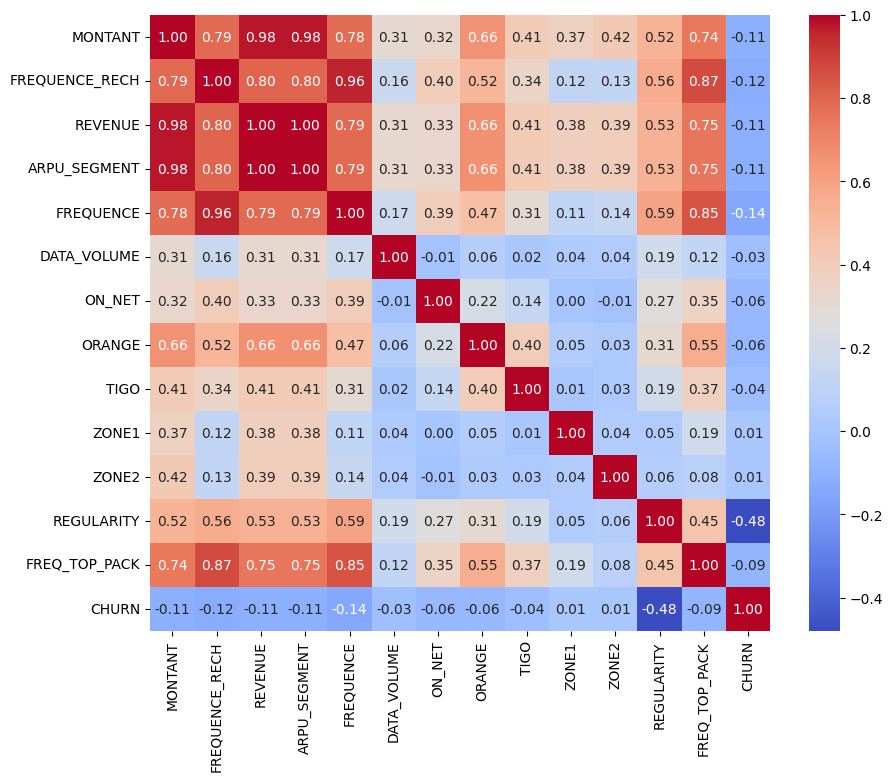

In [30]:
# Plot heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#### Save the dataset (cleaned) into a CSV file

In [31]:
# Clean the data and save it with a different name in a csv format
df_preprocessed = pd.DataFrame(df)

# Specify columns with missing values
numerical_cols = ['MONTANT', 'FREQ_TOP_PACK', 'FREQUENCE_RECH', 'ZONE2', 'ZONE1', 'TIGO', 'ORANGE', 'ON_NET', 'DATA_VOLUME', 'FREQUENCE', 'ARPU_SEGMENT', 'REVENUE']
categorical_cols = ['REGION', 'TOP_PACK']

# Impute missing values for numerical columns
numerical_imputer = SimpleImputer(strategy='median')
df_preprocessed[numerical_cols] = numerical_imputer.fit_transform(df_preprocessed[numerical_cols])

# Impute missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_preprocessed[categorical_cols] = categorical_imputer.fit_transform(df_preprocessed[categorical_cols])

# Verify Changes
print("Null values after preprocessing:\n", df_preprocessed.isnull().sum())

Null values after preprocessing:
 user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64


In [32]:
# Saving the DataFrame to an Excel file
desktop_path = r'C:\Users\USER\Desktop'
csv_file_path = desktop_path + r'\df_preprocessed.csv'

# Save the DataFrame to a CSV file
df_preprocessed.to_csv(csv_file_path, index=False)


## Answering Business Questions

1) What is the overall churn rate observed in the dataset.

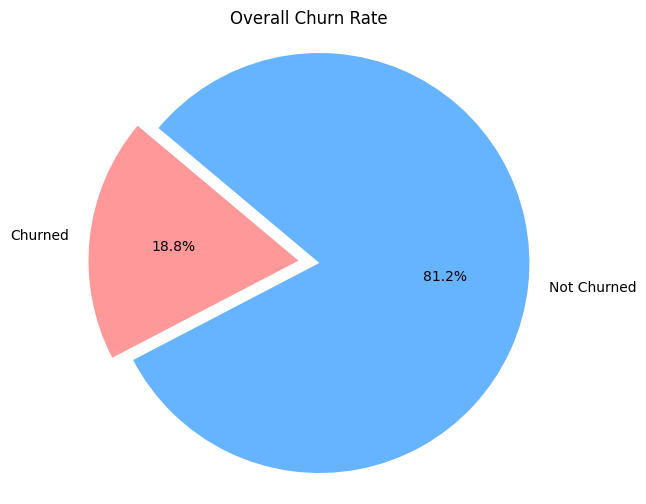

In [33]:
# Calculate churn rate
churn_rate = df_preprocessed['CHURN'].mean()

# Plotting
labels = ['Churned', 'Not Churned']
sizes = [churn_rate, 1 - churn_rate]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (Churned)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Overall Churn Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Insight📣**

- The dataset is imbalanced.
- The overall churn rate observed in the dataset is 18.8%, this suggests that nearly one-fifth of the customer base is leaving the company within a specific period.
- This may indicate fierce competition in the telecommunications industry. Customers might be switching to competitors offering better deals, services, or customer experiences.
- this could also imply dissatisfaction with the company's services, customer support, pricing, or overall experience.

2) How does churn vary across different geographic regions served by the telecommunications company.

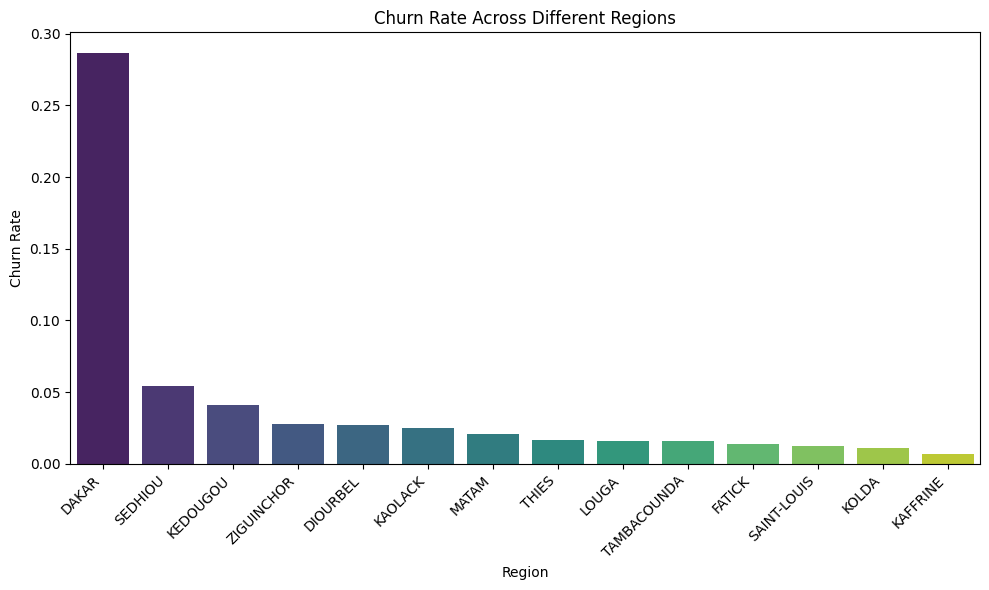

In [34]:
# Calculate churn rate for each region
churn_by_region = df_preprocessed.groupby('REGION')['CHURN'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_region.index, y=churn_by_region.values, palette='viridis')
plt.title('Churn Rate Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight📣**
- **DAKAR:** The region with the highest churn rate at approximately 28.7%. This indicates that customers in Dakar are more likely to churn compared to other regions.
- **SEDHIOU:** With a churn rate of around 5.4%, Sedhiou has a relatively lower churn rate compared to Dakar but still higher than several other regions.
- **KEDOUGOU:** Kedougou follows Sedhiou with a churn rate of about 4.1%, indicating a lower churn rate in this region compared to the previous two.
- **ZIGUINCHOR, DIOURBEL, KAOLACK, MATAM, THIES, LOUGA, TAMBACOUNDA, FATICK, SAINT-LOUIS, KOLDA, KAFFRINE:** These regions exhibit churn rates ranging from 1.7% to 2.9%, showing relatively lower churn compared to Dakar but higher than regions like Kedougou and Sedhiou.
- **KAFFRINE:** Kaffrine has the lowest churn rate among all regions, with only about 0.7% of customers churning.

3) What is the churn rate (proportion of churned customers) for each tenure category.

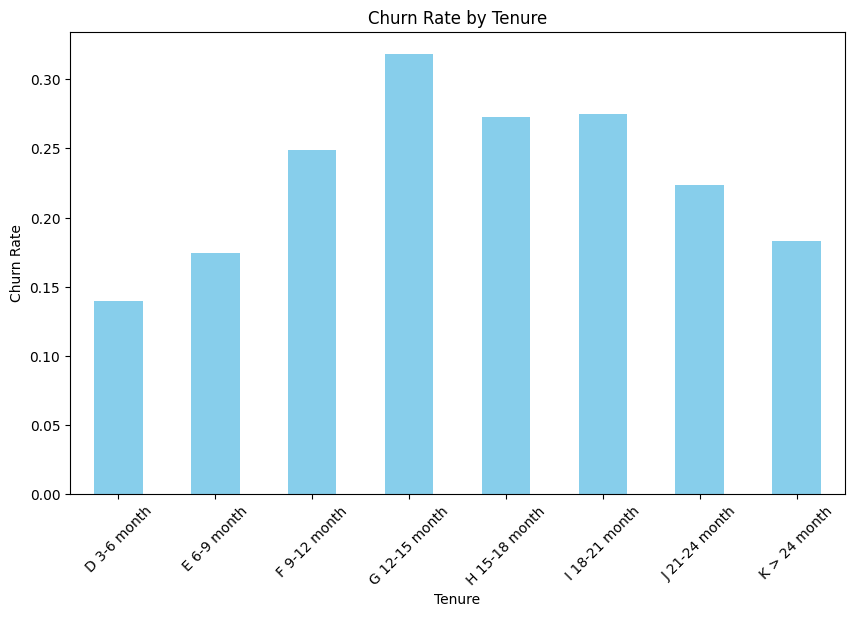

In [35]:
# Group the data by tenure and calculate churn rate
churn_rate_by_tenure = df_preprocessed.groupby('TENURE')['CHURN'].mean()

# Plotting
plt.figure(figsize=(10, 6))
churn_rate_by_tenure.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

4) Are customers who frequently activate specific top pack packages (TOP_PACK) less likely to churn, and can certain top packs be associated with higher customer retention rates?

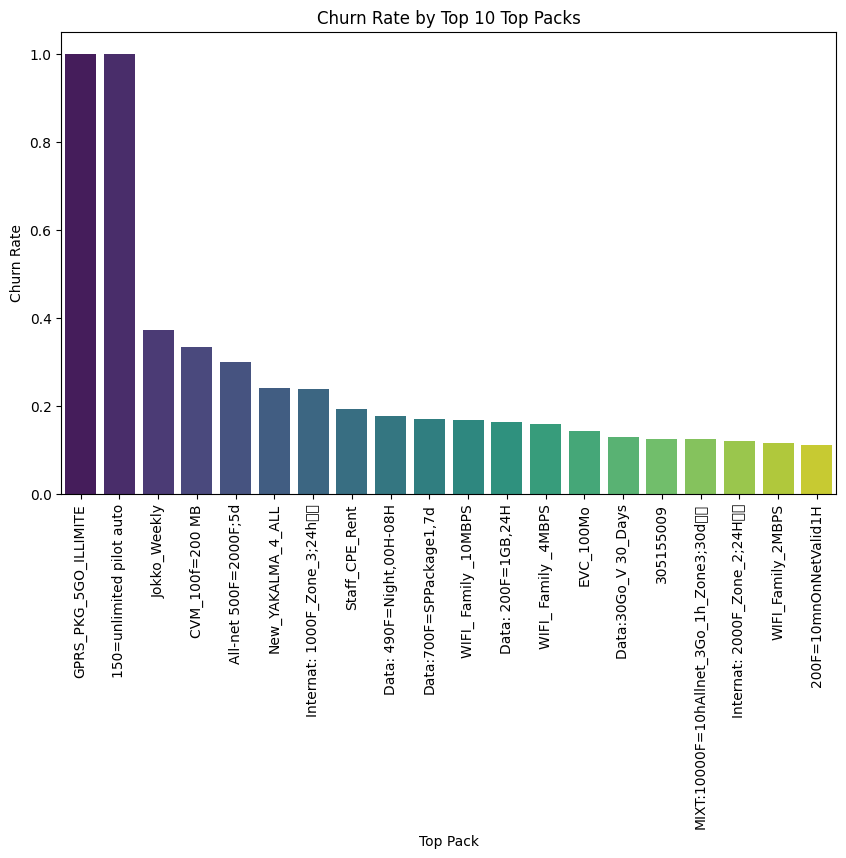

In [36]:
# Group the data by TOP_PACK and calculate churn rate
top_pack_churn_rate = df_preprocessed.groupby('TOP_PACK')['CHURN'].mean().sort_values(ascending=False)[:20]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_pack_churn_rate.index, y=top_pack_churn_rate.values, palette='viridis')
plt.title('Churn Rate by Top 10 Top Packs')
plt.xlabel('Top Pack')
plt.ylabel('Churn Rate')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

**Insight📣**

- **GPRS_PKG_5GO_ILLIMITE and 150=unlimited pilot auto:** These two top packs have a churn rate of 100%, indicating that all customers who subscribed to these packages churned. This suggests that these packages might not meet customer expectations or offer competitive advantages, leading to dissatisfaction and subsequent churn.
- **Jokko_Weekly:** This top pack has a churn rate of 37.3%, indicating that a significant portion of customers who subscribed to this package churned. This might imply that while the package initially attracts customers, it fails to retain them in the long term, possibly due to issues such as pricing, service quality, or competition.
- **CVM_100f=200 MB, All-net 500F=2000F;5d, New_YAKALMA_4_ALL, Internat: 1000F_Zone_3;24h:** These top packs have churn rates ranging from 23.8% to 33.3%. This suggests that while these packages may have some appeal to customers, a significant portion still churn, indicating potential areas for improvement in service offerings or customer experience.
- **Staff_CPE_Rent and Data: 490F=Night,00H-08H:** These top packs have churn rates of around 19.1% and 17.6%, respectively. While the churn rates are relatively lower compared to others, there is still room for optimization to reduce churn further and improve customer retention.
- **Data:700F=SPPackage1,7d:** This top pack has a churn rate of 16.9%, indicating that it has a relatively lower churn rate compared to others in the top 10.

- **Other Top Packages like 200F=10mnOnNetValid1H, Internat: 2000F_Zone_2;24H\t\, EVC_100Mo and WIFI_ Family _4MBPS** exhibits churn rates ranging from 11% to 15% which is relatively lower than others. This suggests that these packages might be more aligned with customer needs or offers better value proposition, leading to higher customer retention.

5) Do customers who have a higher number of on-net calls (ON_NET) exhibit lower churn rates, suggesting a correlation between on-net calling behavior and customer loyalty?

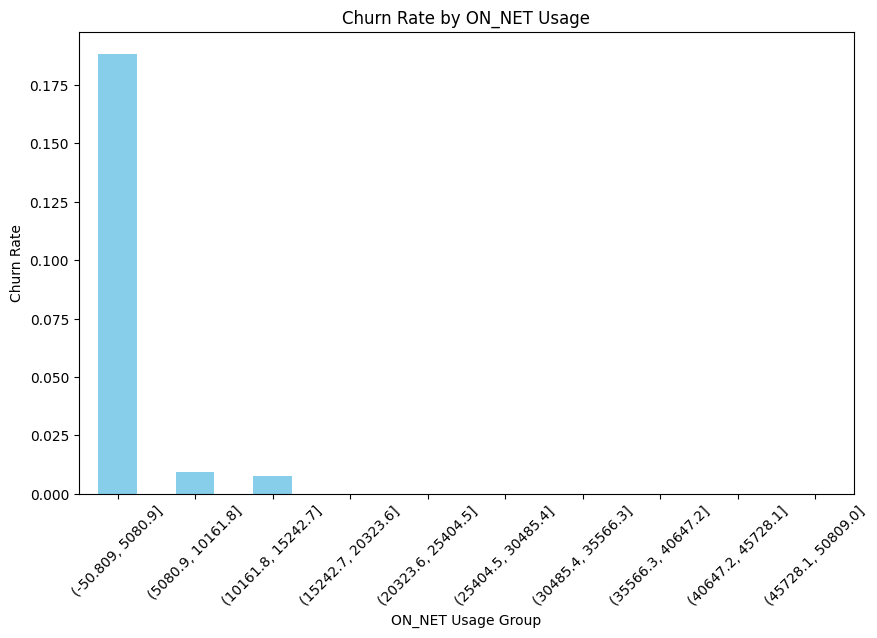

In [37]:
# Group customers based on ON_NET usage
on_net_groups = pd.cut(df_preprocessed['ON_NET'], bins=10)

# Calculate churn rate for each group
churn_rate_by_on_net = df_preprocessed.groupby(on_net_groups)['CHURN'].mean()

# Plotting
plt.figure(figsize=(10, 6))
churn_rate_by_on_net.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by ON_NET Usage')
plt.xlabel('ON_NET Usage Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()



**Insight📣**

- Customers with ON_NET usage between (-50.809, 5080.9] have a churn rate of approximately 18.8%.
- **As ON_NET usage increases, the churn rate decreases significantly.** For example, customers with ON_NET usage between (5080.9, 10161.8] have a churn rate of approximately 0.9%, and those with ON_NET usage between (10161.8, 15242.7] have a churn rate of approximately 0.8%.

This suggests a correlation between higher ON_NET usage and lower churn rates, indicating that customers who make more on-net calls tend to exhibit higher loyalty and are less likely to churn.

6) Is there evidence to suggest that customers who regularly refill their accounts (FREQUENCE_RECH) have lower churn rates compared to those who refill less frequently, indicating a relationship between recharge frequency and churn propensity?

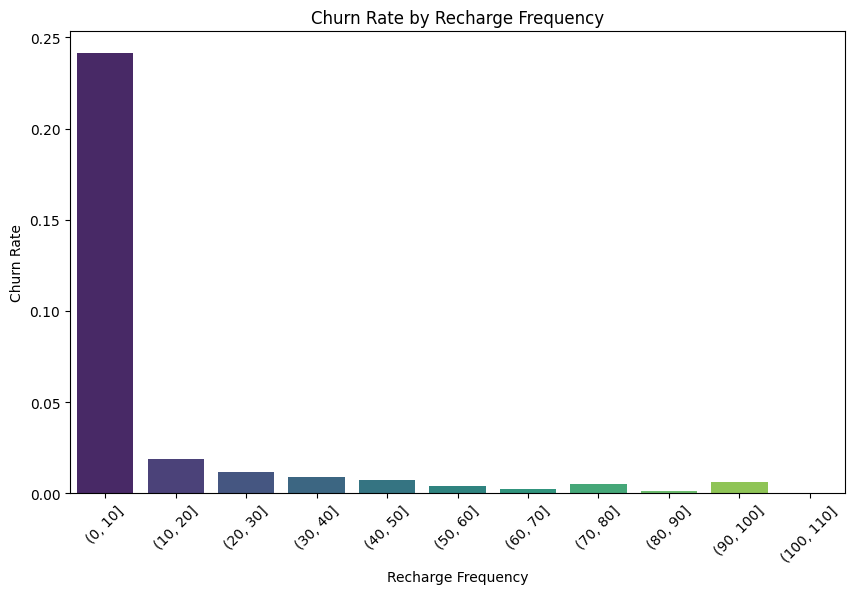

In [38]:
# Group customers based on recharge frequency
bins = pd.interval_range(start=0, end=110, freq=10)
grouped = df_preprocessed.groupby(pd.cut(df_preprocessed['FREQUENCE_RECH'], bins))

# Calculate churn rate for each group
churn_rates = grouped['CHURN'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rates.index.astype(str), y=churn_rates.values, palette='viridis')
plt.title('Churn Rate by Recharge Frequency')
plt.xlabel('Recharge Frequency')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

**Insight📣**

- Customers with recharge frequencies between 0 and 10 have a churn rate of approximately 24.1%.
- As recharge frequency increases, the churn rate generally decreases. For example, customers with recharge frequencies between 10 and 20 have a churn rate of approximately 1.9%, and customers with frequencies between 20 and 30 have a churn rate of approximately 1.2%.
- There is a slight increase in churn rate for customers with recharge frequencies between 70 and 90, but this may be due to the smaller sample size in these ranges.

Overall, evidence suggesting that customers who regularly refill their accounts have lower churn rates compared to those who refill less frequently.

7) Is there a correlation between the top-up amount (MONTANT) and churn rates, and do customers with higher or lower top-up amounts demonstrate different churn behaviors?

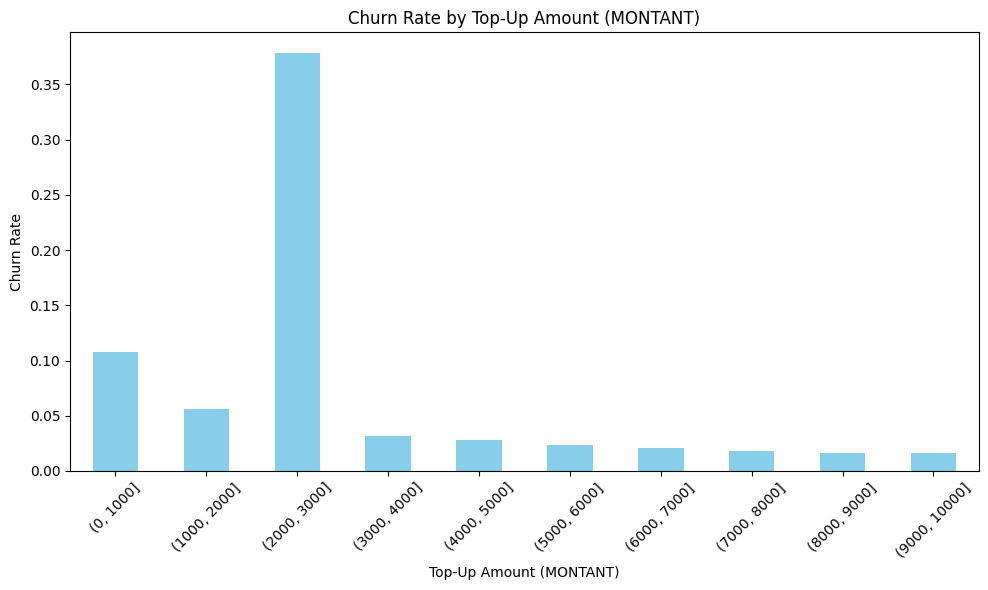

In [39]:
# Define the bins for grouping MONTANT
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

# Group customers based on MONTANT and calculate churn rate for each group
df_preprocessed['MONTANT_GROUP'] = pd.cut(df_preprocessed['MONTANT'], bins=bins)
churn_rate_by_montant = df_preprocessed.groupby('MONTANT_GROUP')['CHURN'].mean()

# Plot the churn rate by MONTANT
plt.figure(figsize=(10, 6))
churn_rate_by_montant.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Top-Up Amount (MONTANT)')
plt.xlabel('Top-Up Amount (MONTANT)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

**Insight📣**

- **Inverted U-shaped Relationship:** There seems to be an inverted U-shaped relationship between MONTANT and churn rates. Churn rates are relatively low for both lower and higher MONTANT groups, while the group with MONTANT between 2000 and 3000 exhibits a significantly higher churn rate.
- **Threshold Effect:** The group with MONTANT between 2000 and 3000 stands out with a disproportionately higher churn rate compared to neighboring groups. This suggests that there might be a threshold effect, where customers who top up within this range are more likely to churn compared to those with lower or higher top-up amounts.
- **Churn Behavior Patterns:** Customers with very low MONTANT (0-1000) demonstrate a relatively higher churn rate compared to those with slightly higher MONTANT (1000-2000). However, as the MONTANT increases beyond 2000, the churn rate gradually decreases, indicating that customers who top up with larger amounts are less likely to churn.

Generally, The churn rate tends to vary across different top-up amount groups, with higher top-up amounts generally associated with lower churn rates. However, there is an exception for the MONTANT group between 2000 and 3000, which has a notably higher churn rate compared to other groups.

Based on these insights, the Expresso could potentially segment its customer base by MONTANT ranges to tailor retention strategies more effectively. For instance, customers in the 2000-3000 MONTANT range might require special attention and targeted retention efforts due to their higher propensity to churn. Similarly, customers in other MONTANT ranges could be approached differently based on their churn behavior patterns.


## Hypothesis Testing

In [40]:
# Create a contingency table of churn and region
contingency_table = pd.crosstab(df_preprocessed['CHURN'], df_preprocessed['REGION'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistic and p-value
print("Chi-Square Statistic:", chi2)
print("P-value:", p)

# Define significance level
alpha = 0.05

# Check the p-value against the significance level
if p < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Chi-Square Statistic: 119249.0812574308
P-value: 0.0
Reject the null hypothesis.


**Insight📣**: There is no significant difference in churn rates between different geographic regions

## Data Preparation

Split data into input (x) and target (y) features

In [41]:
# Drop unnecessary columns and split the data
X = df.drop(['CHURN'], axis=1)  # Features
y = df['CHURN']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  stratify=y, random_state=42)

In [42]:
# Print the shapes of the train and validation sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (861619, 18)
y_train shape: (861619,)
X_test shape: (215405, 18)
y_test shape: (215405,)


### Feature Engineering

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [44]:
# Drop irrelevant columns ('user_id' and 'MRG')
X = X.drop(['user_id', 'MRG', 'ZONE1', 'ZONE2', 'TOP_PACK'], axis=1)

# Verify
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   REGION          652687 non-null   object 
 1   TENURE          1077024 non-null  object 
 2   MONTANT         699139 non-null   float64
 3   FREQUENCE_RECH  699139 non-null   float64
 4   REVENUE         714669 non-null   float64
 5   ARPU_SEGMENT    714669 non-null   float64
 6   FREQUENCE       714669 non-null   float64
 7   DATA_VOLUME     547261 non-null   float64
 8   ON_NET          683850 non-null   float64
 9   ORANGE          629880 non-null   float64
 10  TIGO            432250 non-null   float64
 11  REGULARITY      1077024 non-null  int64  
 12  FREQ_TOP_PACK   626129 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 106.8+ MB


In [45]:
X_num_cols = X.select_dtypes(include=np.number).columns

X_cat_cols = X.select_dtypes(include=['object']).columns

# Verify changes
print("Categorical Variables:")
print(X_cat_cols)
print("Numerical Variables:")
print(X_num_cols)

Categorical Variables:
Index(['REGION', 'TENURE'], dtype='object')
Numerical Variables:
Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY',
       'FREQ_TOP_PACK'],
      dtype='object')


#### Creating a pipeline

In [46]:
# LogTransformer class
class LogTransformer:
    def __init__(self, constant=1):
        self.constant = constant
 
    def transform(self, X_train):
        return np.log1p(X_train + self.constant)
 
 
# Numerical transformer with LogTransformer
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('log_transform', FunctionTransformer(LogTransformer().transform)),
    ('scaler', StandardScaler())
])
  
# Categorical transformer
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder())
])
 
 
# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, X_num_cols),
        ('cat', categorical_pipeline, X_cat_cols)
    ])

## Modelling and Evaluation

In [47]:
# List of models to evaluate
models = [
    ('logistic_classifier', LogisticRegression(random_state=42)),
    ('rf_classifier', RandomForestClassifier(random_state=42))
]

#### Train and Compare Models - Unbalanced

In [48]:
results_table = pd.DataFrame(columns=["Model Name", "Precision", "Recall", "Accuracy", "F1_Score"])

all_pipelines = {}

for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature Importance', SelectKBest(mutual_info_classif, k=15)),
        ('classifier', classifier)                
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Convert y_pred to integers
    y_pred = y_pred.astype(int)

    metrics = classification_report(y_test, y_pred, output_dict=True)

    all_pipelines[model_name] = pipeline

    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']

    results_table.loc[len(results_table)] = [model_name, precision, recall, accuracy, f1_score]

results_table.sort_values('F1_Score', ascending=False)

,Model Name,Precision,Recall,Accuracy,F1_Score
0,logistic_classifier,0.868058,0.869906,0.869906,0.868921
1,rf_classifier,0.864737,0.868216,0.868216,0.866248


**Insight📣**

With the Unbalanced dataset, both models perform comparably well across all metrics, demonstrating their effectiveness in predicting churn. However, the logistic_classifier model slightly outperforms the rf_classifier model in terms of precision, recall, accuracy, and F1-score.

#### Train and Compare Models - Balanced

In [49]:
balanced_data_results_table = pd.DataFrame(columns=["Model Name", "Precision", "Recall", "Accuracy", "F1_Score"])

balanced_pipelines = {}

for model_name, classifier in models:
    pipeline = impipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, sampling_strategy="auto")),
        ('feature Importance', SelectKBest(mutual_info_classif, k=15)),
        ('classifier', classifier)                
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Convert y_pred to integers
    y_pred = y_pred.astype(int)

    balanced_metrics = classification_report(y_test, y_pred, output_dict=True)

    balanced_pipelines[model_name] = pipeline

    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1_score = balanced_metrics['weighted avg']['f1-score']

    balanced_data_results_table.loc[len(balanced_data_results_table)] = [model_name, precision, recall, accuracy, f1_score]

balanced_data_results_table.sort_values(by='F1_Score', ascending=False)

,Model Name,Precision,Recall,Accuracy,F1_Score
1,rf_classifier,0.874764,0.839015,0.839015,0.849778
0,logistic_classifier,0.879239,0.825557,0.825557,0.839869


**Insight📣**

- Precision, representing the model's ability to correctly predict positive observations out of all predicted positives, indicates how accurately churned customers are identified without falsely labeling too many non-churned customers as churned. Both models demonstrate relatively high precision scores, with the logistic_classifier slightly outperforming the rf_classifier.

- Recall, also known as sensitivity, measures the proportion of actual positives correctly identified by the model. The random forest classifier exhibits higher recall compared to the logistic_classifier, suggesting its capability to capture more of the actual positive cases.

- F1-score, the harmonic mean of precision and recall, offers a balanced evaluation between the two metrics. The random forest classifier achieves a slightly higher F1-score compared to the logistic_classifier.

In conclusion, while the logistic_classifier model excels in precision, the random forest classifier outperforms in terms of recall and F1-score. To further evaluate the model performance and make a final determination, it's crucial to explore the Area under the Curve (AOC) metric, which serves as the preferred evaluation metric for this project.

### Visualisualizing ROC - Overlapping

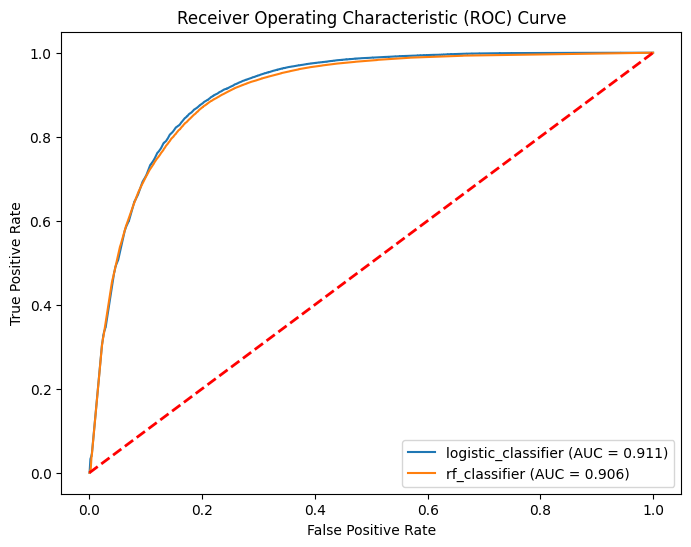

In [50]:
balanced_data_results_table = pd.DataFrame(columns=["Model Name", "Precision", "Recall", "Accuracy", "F1_Score", "AUC"])

balanced_pipelines = {}
roc_curve_data = {}

for model_name, classifier in models:
    pipeline = impipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, sampling_strategy="auto")),
        ('feature Importance', SelectKBest(mutual_info_classif, k=15)),
        ('classifier', classifier)                
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Convert y_pred to integers
    y_pred = y_pred.astype(int)

    # Get predicted probabilities for class 1
    y_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate AUC
    auc = roc_auc_score(y_test, y_prob)
    
    # Calculate other metrics
    balanced_metrics = classification_report(y_test, y_pred, output_dict=True)

    balanced_pipelines[model_name] = pipeline

    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1_score = balanced_metrics['weighted avg']['f1-score']

    balanced_data_results_table.loc[len(balanced_data_results_table)] = [model_name, precision, recall, accuracy, f1_score, auc]

balanced_data_results_table.sort_values(by='F1_Score', ascending=False)

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))
for model_name, pipeline in balanced_pipelines.items():
    # Get predicted probabilities for class 1
    y_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate fpr, tpr
    fpr, tpr, threshold = roc_curve(y_test, y_prob)

    roc_curve_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': threshold})

    roc_curve_data[model_name] = roc_curve_df
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {balanced_data_results_table[balanced_data_results_table["Model Name"] == model_name]["AUC"].values[0]:.3f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Insight📣**

- The Logistic Classifier emerges as the top performer from the depicted AUC curve analysis, boasting an impressive AUC of 0.911. Its robust discriminatory power underscores its effectiveness in accurately distinguishing between churned and non-churned customers across various threshold levels, making it a reliable choice for churn prediction.

- Although slightly trailing behind the Logistic Classifier, the Random Forest Classifier still demonstrates strong performance with an AUC of 0.906. This signifies its proficiency in classifying churned and non-churned customers, albeit with a marginally lower discriminatory power compared to the Logistic Classifier.

In conclusion, opting for the Logistic Classifier as the primary model for predicting customer churn offers the dual benefit of effectively identifying potential churners while minimizing false positives. This strategic approach maximizes predictive accuracy and enhances decision-making in customer retention efforts.


#### ROC_Curve Data (Logistic Classifier)

In [51]:
# pd.reset_option('display.max_rows', None)
# pd.reset_option('display.max_columns', None)
roc_curve_data['logistic_classifier']

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,inf
1,0.000006,0.000025,0.968524
2,0.000006,0.000074,0.966207
3,0.000017,0.000074,0.965485
4,0.000017,0.000099,0.965463
...,...,...,...
17729,0.992252,0.999975,0.006004
17730,0.992252,1.000000,0.006004
17731,0.999229,1.000000,0.004302
17732,0.999240,1.000000,0.004295


[[143099  31907]
 [  5669  34730]]


<Axes: >

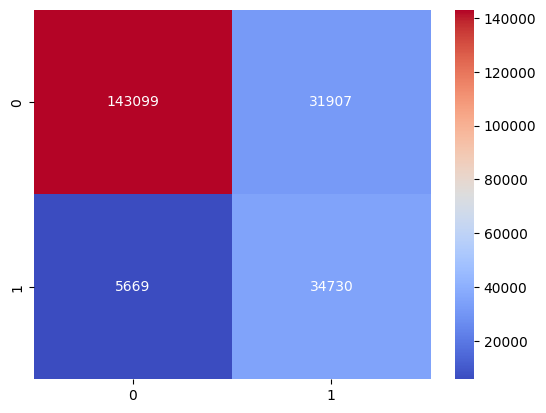

In [52]:
logistic_pipeline = balanced_pipelines['logistic_classifier']

logistic_y_pred = logistic_pipeline.predict(X_test)

matrix = confusion_matrix(y_test, logistic_y_pred)

print(matrix)

# visualize the matrix
sns.heatmap(data=matrix, annot=True, fmt='d', cmap='coolwarm')

[[93308 81698]
 [  597 39802]]


<Axes: >

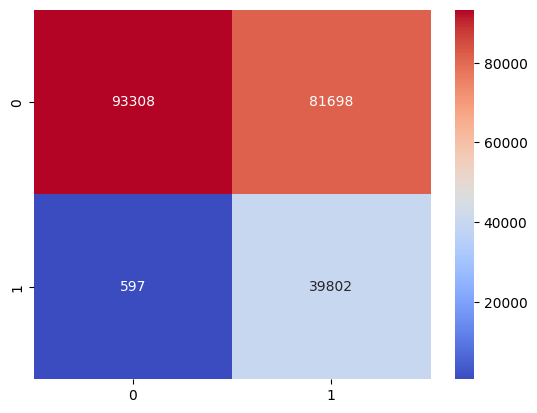

In [53]:
threshold = 0.12

y_pred_proba = logistic_pipeline.predict_proba(X_test)[:, 1]

binary_prediction = (y_pred_proba >= threshold)

threshold_matrix = confusion_matrix(y_test, binary_prediction)

print(threshold_matrix)

# visualize the threshold_matrix
sns.heatmap(data=threshold_matrix, annot=True, fmt='d', cmap='coolwarm')

#### ROC_Curve Data (Random forest Classifier)

In [54]:
# pd.reset_option('display.max_rows', None)
# pd.reset_option('display.max_columns', None)
roc_curve_data['rf_classifier']

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,inf
1,0.000731,0.003465,1.000000
2,0.000743,0.003465,0.999476
3,0.000743,0.003490,0.999429
4,0.000766,0.003490,0.998889
...,...,...,...
4556,0.663360,0.993069,0.000278
4557,0.663412,0.993069,0.000105
4558,0.663423,0.993069,0.000083
4559,0.663429,0.993069,0.000078


[[143099  31907]
 [  5669  34730]]


<Axes: >

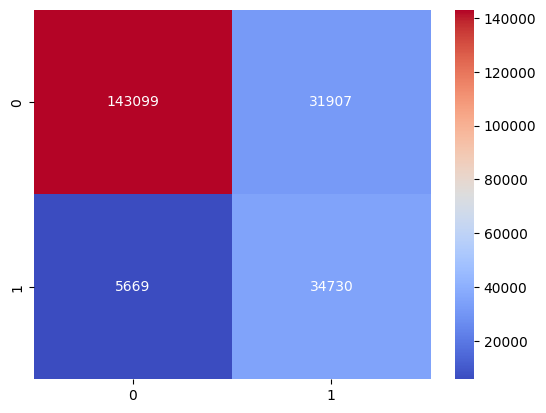

In [55]:
rf_pipeline = balanced_pipelines['logistic_classifier']

rf_y_pred = rf_pipeline.predict(X_test)

rf_matrix = confusion_matrix(y_test, rf_y_pred)

print(rf_matrix)

# visualize the matrix
sns.heatmap(data=rf_matrix, annot=True, fmt='d', cmap='coolwarm')

[[93308 81698]
 [  597 39802]]


<Axes: >

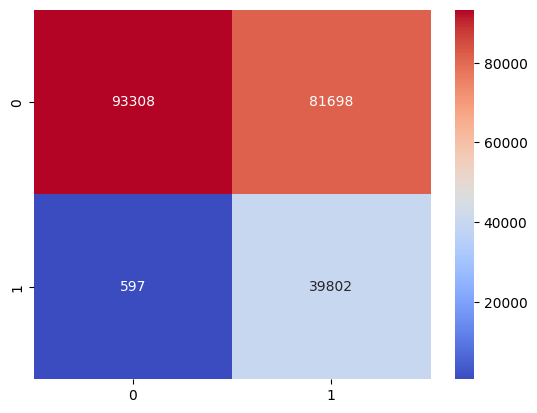

In [56]:
threshold = 0.12

rf_y_pred_proba = rf_pipeline.predict_proba(X_test)[:, 1]

rf_binary_prediction = (rf_y_pred_proba >= threshold)

rf_threshold_matrix = confusion_matrix(y_test, rf_binary_prediction)

print(rf_threshold_matrix)

# visualize the threshold_matrix
sns.heatmap(data=rf_threshold_matrix, annot=True, fmt='d', cmap='coolwarm')

### Model Persistence

In [57]:
# Dump the logistic regression model to the models directory
joblib.dump(logistic_pipeline, '../Models/logistic_model.joblib')

# Dump the random forest model to the models directory
joblib.dump(rf_pipeline, '../Models/random_forest_model.joblib')


['../Models/random_forest_model.joblib']

## LOAD TEST DATASET

In [58]:
# Read the test.CSV file into a DataFrame
test_df = pd.read_csv('../Dataset/Test.csv')
test_df

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190058,1092956a3dad77ceb7e8d7c70e3e13f77b60e2aa,DAKAR,F 9-12 month,500.0,1.0,506.0,169.0,1.0,0.0,26.0,NaN,NaN,6.0,NaN,NO,14,All-net 500F=2000F;5d,1.0
190059,bec10becca7faa8e9cab9981b3aee5e9a7f04828,DAKAR,K > 24 month,2000.0,4.0,2000.0,667.0,5.0,0.0,8.0,54.0,NaN,NaN,NaN,NO,29,All-net 500F =2000F_AllNet_Unlimited,3.0
190060,7ac6fc191f8732b1b146e57f9ede983626b93eae,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
190061,d592c81971d6120b0d19f9ace85f278ea21b89a0,NaN,K > 24 month,300.0,2.0,298.0,99.0,2.0,0.0,1.0,2.0,NaN,NaN,NaN,NO,12,NaN,NaN


In [59]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         190063 non-null  object 
 1   REGION          115330 non-null  object 
 2   TENURE          190063 non-null  object 
 3   MONTANT         123695 non-null  float64
 4   FREQUENCE_RECH  123695 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     96716 non-null   float64
 9   ON_NET          120771 non-null  float64
 10  ORANGE          111417 non-null  float64
 11  TIGO            76555 non-null   float64
 12  ZONE1           14850 non-null   float64
 13  ZONE2           12011 non-null   float64
 14  MRG             190063 non-null  object 
 15  REGULARITY      190063 non-null  int64  
 16  TOP_PACK        110773 non-null  object 
 17  FREQ_TOP_P

In [60]:
# Drop columns as applied during preprocessing of Train Data
columns_to_drop = ['user_id', 'MRG', 'ZONE1', 'ZONE2', 'TOP_PACK']
test_df.drop(columns=columns_to_drop, inplace=True)

# verify
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   REGION          115330 non-null  object 
 1   TENURE          190063 non-null  object 
 2   MONTANT         123695 non-null  float64
 3   FREQUENCE_RECH  123695 non-null  float64
 4   REVENUE         126422 non-null  float64
 5   ARPU_SEGMENT    126422 non-null  float64
 6   FREQUENCE       126422 non-null  float64
 7   DATA_VOLUME     96716 non-null   float64
 8   ON_NET          120771 non-null  float64
 9   ORANGE          111417 non-null  float64
 10  TIGO            76555 non-null   float64
 11  REGULARITY      190063 non-null  int64  
 12  FREQ_TOP_PACK   110773 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usage: 18.9+ MB


In [61]:
# Load the pre-trained logistic_model
logistic_model = joblib.load("../Models/logistic_model.joblib")

# Make predictions using the loaded logistic model on test data
prediction = logistic_model.predict(test_df)

# Print the predictions
print(prediction)

[0 1 0 ... 1 0 1]


In [62]:
# Add the predictions as a new column to the test_data DataFrame
test_df['CHURN'] = prediction

# Print the DataFrame with the predictions
test_df

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
0,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,35,5.0,0
1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1
2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,22,NaN,0
3,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,1
4,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,60,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190058,DAKAR,F 9-12 month,500.0,1.0,506.0,169.0,1.0,0.0,26.0,NaN,NaN,14,1.0,0
190059,DAKAR,K > 24 month,2000.0,4.0,2000.0,667.0,5.0,0.0,8.0,54.0,NaN,29,3.0,0
190060,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1
190061,NaN,K > 24 month,300.0,2.0,298.0,99.0,2.0,0.0,1.0,2.0,NaN,12,NaN,0


In [63]:
# Count the occurrences of unique values in the 'CHURN' column of the test data
test_df['CHURN'].value_counts()

CHURN
0    131422
1     58641
Name: count, dtype: int64

**Insight📣**

- The model predicted the churn status of customers for the test dataset. The number of customers that churned were 58,641 (30.85%) and those who did not churn were 131,422 (69.15%)

## RECOMMENDATIONS

1. Personalized Marketing: 
Tailor marketing campaigns to individual customer preferences and behaviour. Use data to send targeted offers, discounts, or content that resonates with each customer.
2. Customer Feedback Analysis: 
Analyze customer feedback and complaints to address underlying issues promptly. Improving customer service and product quality can prevent churn.
3. Loyalty Programs: 
Implement loyalty programs that reward loyal customers, encouraging them to stay with your brand.
4. Customer Engagement: 
Keep customers engaged through email newsletters, social media interactions, and personalized content to maintain their interest and loyalty.
5. Predictive Analytics: 
Continuously refine churn prediction models using new data to adapt to changing customer behaviour and trends. 

